In [ ]:
%run wfg.ipynb

In [ ]:
from tqdm import tqdm

# Contents

* 1. Message gaurentee vs Deadlock detection accuracy
    * Experiments
    * Results
* 2. No of messages
    * Experiments
    * Results

# 1. Message gaurentee vs Deadlock detection accuracy

## 1.1 Running experiments

In [1]:
%run brancha.ipynb

NameError: name 'non_deadlocked_wfg' is not defined

In [4]:
logger.disabled = True
num_experiments = 100

In [5]:
for _ in range(10):
    
    msg_gaurentee = _ / 10 + 0.1
    
    for _ in tqdm(range(num_experiments)):
        
        send_pipes = [[None for _ in range(num_processes)] for _ in range(num_processes)]
        recv_pipes = [[None for _ in range(num_processes)] for _ in range(num_processes)]

        for i in range(num_processes):
            for j in range(num_processes):
                send_pipes[i][j], recv_pipes[j][i] = Pipe()
        
        processes = [Process(target=process, args=(id, num_processes, send_pipes[id], recv_pipes[id], 
                                                   get_waiting_on(id, wfg), get_waited_by(id, wfg), id==initiator, timeout))
                    for id in range(num_processes)]

        for p in processes:
            p.start()

        for p in processes:
            p.join()
            
        with open(msg_filename, 'a+') as f: f.write("\n")

100%|██████████| 100/100 [00:06<00:00, 14.39it/s]


In [6]:
%run ch.ipynb

In [7]:
num_experiments = 100

In [8]:
for _ in range(10):
    msg_gaurentee = _ / 10 + 0.1

    for _ in tqdm(range(num_experiments)):
        send_pipes = [[None for _ in range(num_processes + 1)] for _ in range(num_processes + 1)]
        recv_pipes = [[None for _ in range(num_processes + 1)] for _ in range(num_processes + 1)]

        for i in range(num_processes + 1):
            for j in range(num_processes + 1):
                send_pipes[i][j], recv_pipes[j][i] = Pipe()
                
                
        processes = [Process(target=process, args=(id, num_processes, send_pipes[id], recv_pipes[id], 
                                                   get_waiting_on(id, wfg), timeout))
                    for id in range(num_processes)]

        for p in processes: p.start()

        processes.append(Process(target=initiator_process, args=(num_processes, send_pipes[num_processes], recv_pipes[num_processes],
                                                               initiator, timeout)))

        processes[-1].start(); processes[-1].join()

        for p in processes: p.terminate()
        
        with open(msg_filename, 'a+') as f: f.write("\n")

100%|██████████| 100/100 [00:11<00:00,  8.53it/s]


In [9]:
%run chm.ipynb

In [10]:
num_experiments = 100

In [11]:
for _ in range(10):
    
    msg_gaurentee = _ / 10 + 0.1
    
    for _ in tqdm(range(num_experiments)):
        
        send_pipes = [[None for _ in range(num_processes)] for _ in range(num_processes)]
        recv_pipes = [[None for _ in range(num_processes)] for _ in range(num_processes)]
        
        for i in range(num_processes):
            for j in range(num_processes):
                send_pipes[i][j], recv_pipes[j][i] = Pipe()
                
        processes = [Process(target=process, args=(id, num_processes, send_pipes[id], recv_pipes[id], 
                                                   get_waiting_on(id, wfg), id==initiator, timeout))
                    for id in range(num_processes)]

        for p in processes:
            p.start()

        for p in processes:
            p.join()
        
        with open(msg_filename, 'a+') as f: f.write("\n")

100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


## 1.2 Results

In [12]:
import matplotlib.pyplot as plt

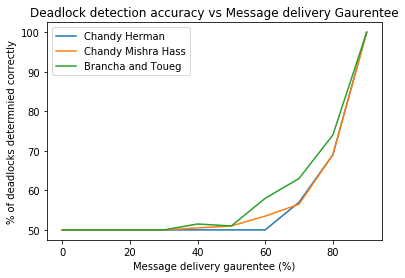

In [13]:
f = open("ch_log.txt").read()[:-1]

vals = {}

for row in f.split("\n"):
    i, j = [float(i) for i in row.split(' ')]
    if i in vals:
        vals[i] += j
    else:
        vals[i] = j
    
for i in vals: vals[i] += num_experiments; vals[i] = vals[i] / 2
vals1 = vals

f = open("chm_log.txt").read()[:-1]

vals = {}

for row in f.split("\n"):
    i, j = [float(i) for i in row.split(' ')]
    if i in vals:
        vals[i] += j
    else:
        vals[i] = j

for i in vals: vals[i] += num_experiments; vals[i] = vals[i] / 2
vals2 = vals

f = open("brancha.txt").read()[:-1]

vals = {}

for row in f.split("\n"):
    i, j = [float(i) for i in row.split(' ')]
    if i in vals:
        vals[i] += j
    else:
        vals[i] = j

for i in vals: vals[i] += num_experiments; vals[i] = vals[i] / 2
vals3 = vals

plt.plot(list(range(0, 100, 10)), list(vals1.values()))
plt.plot(list(range(0, 100, 10)),list(vals2.values()))
plt.plot(list(range(0, 100, 10)),list(vals3.values()))
plt.legend([ 'Chandy Herman', 'Chandy Mishra Hass', 'Brancha and Toueg'])
plt.title('Deadlock detection accuracy vs Message delivery Gaurentee')
plt.xlabel('Message delivery gaurentee (%)')
plt.ylabel('% of deadlocks determnied correctly')
plt.savefig("accuracy_vs_msg_gaurentee.png")

# 2. No of messages

In [ ]:
import os
os._exit(00)

In [2]:
%run wfg.ipynb
from tqdm import tqdm
import matplotlib.pyplot as plt

## 2.1 Running the experiments

In [3]:
%run brancha.ipynb

In [4]:
msg_filename = 'brancha_msg.txt'
with open(msg_filename, 'w+') as f:
    f.write('')
    
msg_gaurentee = 1
logger.setLevel(logging.WARNING)
    
for wfg in [deadlocked_wfg, deadlocked_wfg2, deadlocked_wfg3, non_deadlocked_wfg, non_deadlocked_wfg2, non_deadlocked_wfg3]:
    
    send_pipes = [[None for _ in range(num_processes)] for _ in range(num_processes)]
    recv_pipes = [[None for _ in range(num_processes)] for _ in range(num_processes)]

    for i in range(num_processes):
        for j in range(num_processes):
            send_pipes[i][j], recv_pipes[j][i] = Pipe()

    processes = [Process(target=process, args=(id, num_processes, send_pipes[id], recv_pipes[id], 
                                               get_waiting_on(id, wfg), get_waited_by(id, wfg), id==initiator, timeout))
                for id in range(num_processes)]

    for p in processes:
        p.start()

    for p in processes:
        p.join()
        
    with open(msg_filename, 'a+') as f: f.write("\n")

ERROR:MPLogger:Deadlocked
ERROR:MPLogger:Deadlocked
ERROR:MPLogger:Deadlocked
ERROR:MPLogger:Not Deadlocked
ERROR:MPLogger:Not Deadlocked
ERROR:MPLogger:Not Deadlocked


In [5]:
%run ch.ipynb

In [6]:
msg_filename = 'ch_msg.txt'
with open(msg_filename, 'w+') as f:
    f.write('')
    
msg_gaurentee = 1
logger.setLevel(logging.WARNING)
    
for wfg in [deadlocked_wfg, deadlocked_wfg2, deadlocked_wfg3, non_deadlocked_wfg, non_deadlocked_wfg2, non_deadlocked_wfg3]:
    send_pipes = [[None for _ in range(num_processes + 1)] for _ in range(num_processes + 1)]
    recv_pipes = [[None for _ in range(num_processes + 1)] for _ in range(num_processes + 1)]
    
    for i in range(num_processes + 1):
        for j in range(num_processes + 1):
            send_pipes[i][j], recv_pipes[j][i] = Pipe()
            
    processes = [Process(target=process, args=(id, num_processes, send_pipes[id], recv_pipes[id], 
                                               get_waiting_on(id, wfg), timeout))
                for id in range(num_processes)]

    for p in processes:
        p.start()

    processes.append(Process(target=initiator_process, args=(num_processes, send_pipes[num_processes], recv_pipes[num_processes],
                                                           initiator, timeout)))

    processes[-1].start()
    processes[-1].join()

    for p in processes:
        p.terminate()
        
    with open(msg_filename, 'a+') as f: f.write("\n")

ERROR:MPLogger:Deadlocked!
ERROR:MPLogger:Deadlocked!
ERROR:MPLogger:Deadlocked!
ERROR:MPLogger:Not deadlocked!
ERROR:MPLogger:Not deadlocked!
ERROR:MPLogger:Not deadlocked!


In [7]:
%run chm.ipynb

In [8]:
msg_filename = 'chm_msg.txt'
with open(msg_filename, 'w+') as f:
    f.write('')
    
msg_gaurentee = 1
logger.setLevel(logging.WARNING)

for wfg in [deadlocked_wfg, deadlocked_wfg2, deadlocked_wfg3, non_deadlocked_wfg, non_deadlocked_wfg2, non_deadlocked_wfg3]:
    
    send_pipes = [[None for _ in range(num_processes + 1)] for _ in range(num_processes + 1)]
    recv_pipes = [[None for _ in range(num_processes + 1)] for _ in range(num_processes + 1)]
    
    for i in range(num_processes + 1):
        for j in range(num_processes + 1):
            send_pipes[i][j], recv_pipes[j][i] = Pipe()
            
    processes = [Process(target=process, args=(id, num_processes, send_pipes[id], recv_pipes[id], 
                                               get_waiting_on(id, wfg), id==initiator, timeout))
                for id in range(num_processes)]

    for p in processes:
        p.start()

    for p in processes:
        p.join()

    with open(msg_filename, 'a+') as f: f.write("\n")

ERROR:MPLogger:Deadlocked!
ERROR:MPLogger:Deadlocked!
ERROR:MPLogger:Deadlocked!
ERROR:MPLogger:Not Deadlocked!
ERROR:MPLogger:Not Deadlocked!
ERROR:MPLogger:Not Deadlocked!


## 2.2 Results

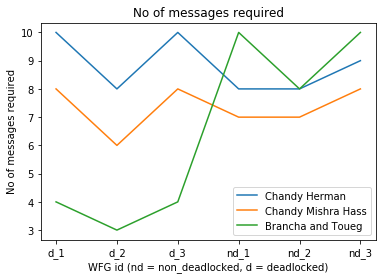

In [9]:
with open('brancha_msg.txt') as f: l1 = [len(i) for i in f.read().split('\n')[:-1]]
with open('ch_msg.txt') as f: l2 = [len(i) for i in f.read().split('\n')[:-1]]
with open('chm_msg.txt') as f: l3 = [len(i) for i in f.read().split('\n')[:-1]]
    
labels = ['d_' + str(i) for i in range(1, 4)] + ['nd_' + str(i) for i in range(1, 4)]
plt.plot(labels, l2)
plt.plot(labels, l3)
plt.plot(labels, l1)
plt.legend([ 'Chandy Herman', 'Chandy Mishra Hass', 'Brancha and Toueg'])
plt.title('No of messages required')
plt.xlabel('WFG id (nd = non_deadlocked, d = deadlocked)')
plt.ylabel('No of messages required')
plt.savefig("no_messages.png")